In [5]:
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np


In [6]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import gaussian_utils as GU
import metrics as ms
import utils as ut
from file_source import MultiItemFileSource
from trajectory_analyzer import TrajectoryAnalyzer


In [7]:
def get_functional_start_idx_from_file_name(file_name: str) -> int:
    functionals = ["pbe", "b3p", "tpss", "wb97", "bp86"]
    name = file_name.lower()
    for f in functionals:
        idx = name.find(f)
        if idx >= 0:
            return idx

def extract_traj_name(traj_path: Path) -> str:
    start_idx = get_functional_start_idx_from_file_name(traj_path.stem)
    end_idx = traj_path.stem.find("_opt")
    return traj_path.stem[start_idx:end_idx].lower()

def get_base_and_traj_paths(search_dir: Path, base_file_name: str) -> Tuple[Path, List[Path]]:
    all_paths = ut.get_file_paths_in_dir(
        search_dir=search_dir,
        file_extension=".xyz"
        )

    base_path = [x for x in all_paths if x.name.lower() == base_file_name.lower()][0]
    traj_paths = [x for x in all_paths if x.name.lower() != base_file_name.lower()]

    return (base_path, traj_paths)

def create_traj_analyzer(
                        trajectories_dir: Path,
                        base_file_name: str,
                        description: str,
                        ) -> TrajectoryAnalyzer:

    base_path, traj_paths = get_base_and_traj_paths(
                                search_dir=trajectories_dir,
                                base_file_name=base_file_name
                                )


    base_trajectory = MultiItemFileSource(
        file_path=base_path,
        name=extract_traj_name(traj_path=base_path),
        item_idxs=num_steps
      )

    trajectories_to_compare = [
        MultiItemFileSource(
          file_path=x,
          name=extract_traj_name(traj_path=x),
          item_idxs=num_steps
          ) for x in traj_paths
      ]

    return TrajectoryAnalyzer(
                            description=description,
                            base_trajectory=base_trajectory,
                            trajectories_to_compare=trajectories_to_compare,
                            metric_functions=metric_funcs,
                          )
    

In [8]:
metric_funcs = [
  (ms.mad_of_positions, "mean_abs_dist"),
  (ms.rmsd_of_positions, "root_mean_of_sq_dist"),
  (ms.mean_abs_coord_diff, "mean_abs_coord_diff"),
]

num_steps = 10

In [9]:
###############################################################################
# mol24
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/original")
base_file_name = "pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "original optimization trajectories"

original_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [10]:
###############################################################################
# mol24_ex16_crest5
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex16_c5")
base_file_name = "ex16_c5_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex16_crest5 optimization trajectories"

ex16_c5_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [11]:
###############################################################################
# mol24_ex19_crest23
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex19_c23")
base_file_name="ex19_c23_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex19_crest23 optimization trajectories"

ex19_c23_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [12]:
###############################################################################
# ex0a_c10
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c10")
base_file_name="ex0a_c10_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_crest10 optimization trajectories"

ex0a_c10_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0a_c24
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c24")
base_file_name="ex0a_c24_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_crest24 optimization trajectories"

ex0a_c24_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0a_c26
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c26")
base_file_name="ex0a_c26_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_crest26 optimization trajectories"

ex0a_c26_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [13]:
traj_analyzer = original_traj_analyzer
#traj_analyzer = ex16_c5_traj_analyzer
#traj_analyzer = ex19_c23_traj_analyzer
#traj_analyzer = ex0a_c10_traj_analyzer

In [14]:
print(traj_analyzer.metrics.keys())
# 'mean_abs_dist', 'root_mean_of_sq_dist', 'mean_abs_coord_diff'
#metric_key = "mean_abs_dist"
metric_key = "root_mean_of_sq_dist"


dict_keys(['mean_abs_dist', 'root_mean_of_sq_dist', 'mean_abs_coord_diff'])


In [15]:
print(traj_analyzer.metrics[metric_key].keys())
# 'base_name', 'names_to_compare', 'to_base', 'to_base_future', 
# 'base_to_start', 'traj_to_start', 'base_incremental', 'traj_incremental'
traj_analyzer.metrics[metric_key]["names_to_compare"]


dict_keys(['base_name', 'names_to_compare', 'to_base', 'to_base_future', 'to_base_last_step', 'base_to_start', 'base_to_last', 'traj_to_start', 'base_incremental', 'traj_incremental'])


['b3p86_def2svpp_svpfit',
 'bp86_def2svpp_svpfit',
 'bp86_sto3g',
 'pbe1pbe_def2svpp_svpfit',
 'pbe1pbe_sto3g',
 'tpss_gd3_def2svpp_svpfit',
 'wb97xd_def2svpp_svpfit']

In [16]:
for i, traj_to_compare in enumerate(traj_analyzer.trajectories_to_compare):
  print(traj_analyzer.description)
  print(traj_to_compare.name, "diff to: ", traj_analyzer.base_trajectory.name)
  print(f"{metric_key} (angstroms)")
  print(np.round(traj_analyzer.metrics[metric_key]["to_base_last_step"][i], 2))
  print("-" * 80)


original optimization trajectories
b3p86_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
root_mean_of_sq_dist (angstroms)
[0.23 0.36 0.33 0.41 0.52 0.67 0.7  0.73 0.72 0.73]
--------------------------------------------------------------------------------
original optimization trajectories
bp86_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
root_mean_of_sq_dist (angstroms)
[0.23 0.42 0.45 0.86 0.93 0.97 1.03 1.2  1.2  1.19]
--------------------------------------------------------------------------------
original optimization trajectories
bp86_sto3g diff to:  pbe1pbe_cc_pvtz_tzvpfit
root_mean_of_sq_dist (angstroms)
[0.23 0.32 0.41 0.7  0.96 1.03 1.04 1.05 1.05 1.05]
--------------------------------------------------------------------------------
original optimization trajectories
pbe1pbe_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
root_mean_of_sq_dist (angstroms)
[0.23 0.32 0.34 0.38 0.54 0.73 0.72 0.82 0.95 0.95]
---------------------------------------------------------------

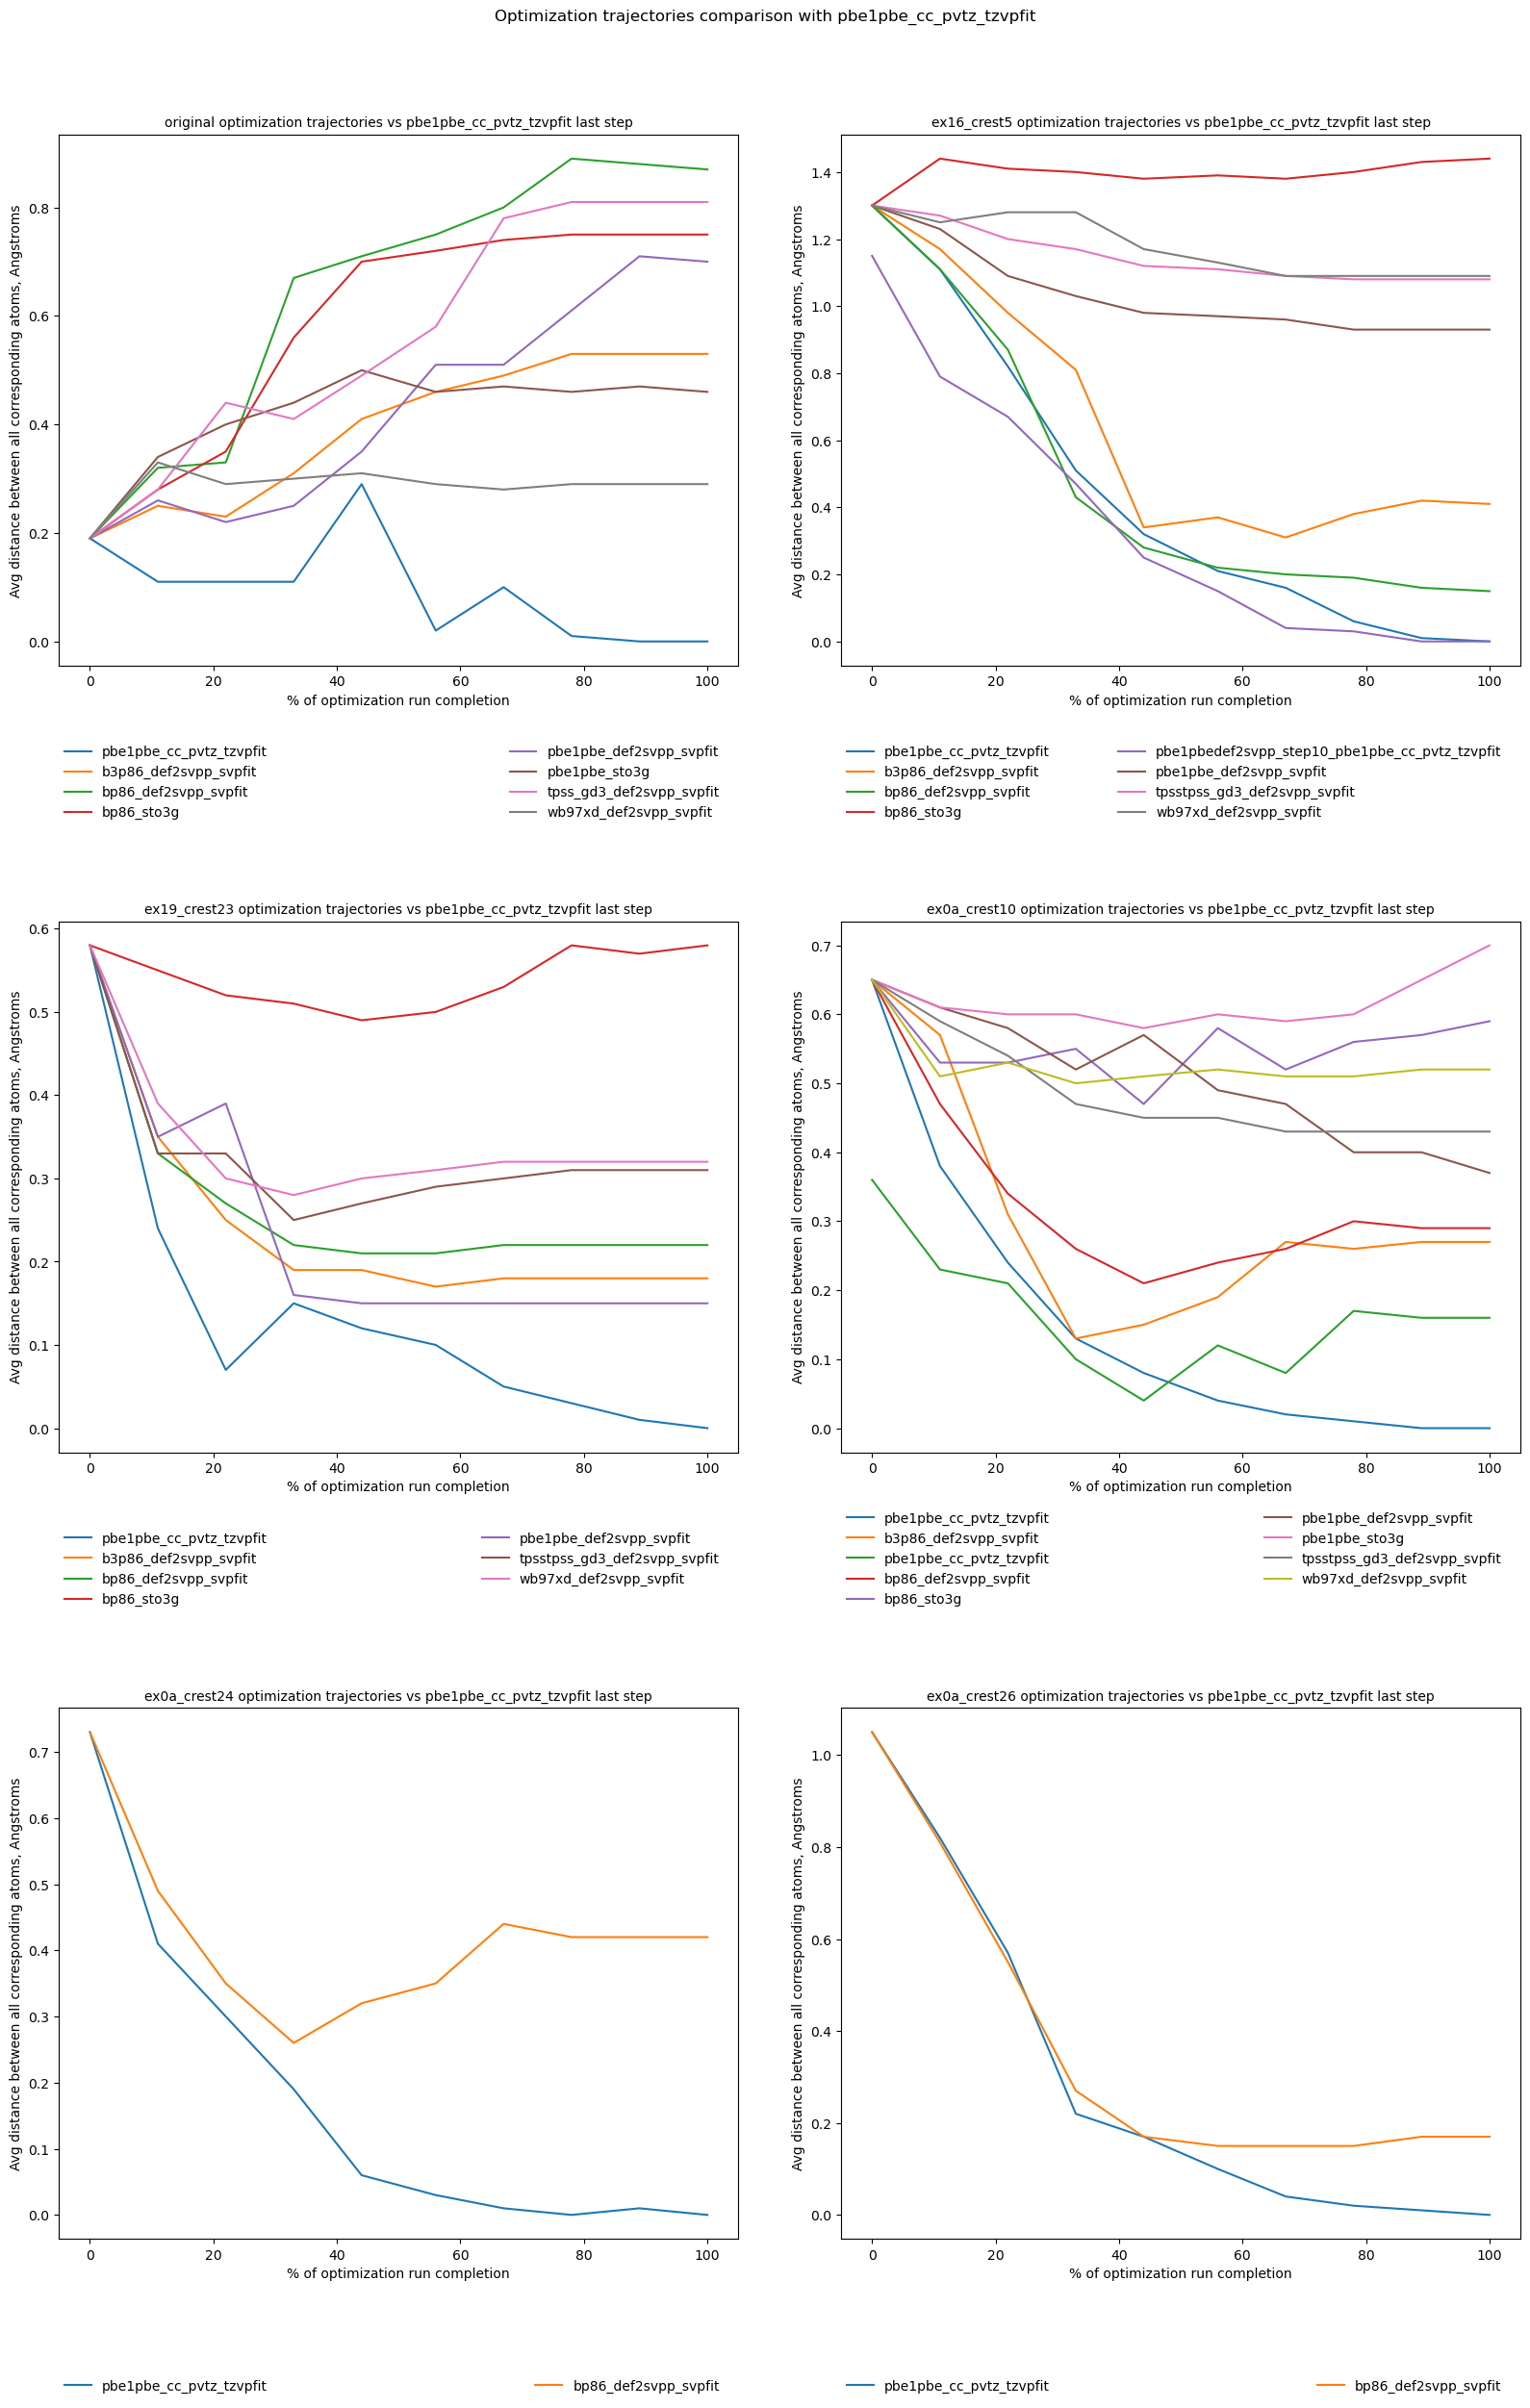

In [17]:
analyzers = [
    original_traj_analyzer,
    ex16_c5_traj_analyzer,
    ex19_c23_traj_analyzer,
    ex0a_c10_traj_analyzer,
    ex0a_c24_traj_analyzer,
    ex0a_c26_traj_analyzer,
    ]
analyzer_names = [a.description for a in analyzers]

n = len(analyzer_names)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 8, num_rows * 8)

title = "Optimization trajectories comparison with pbe1pbe_cc_pvtz_tzvpfit"
x_label = "% of optimization run completion"
y_label = "Avg distance between all corresponding atoms, Angstroms"
metric_key = "mean_abs_dist"
#metric_key = "root_mean_of_sq_dist"
#metric_key = "mean_abs_coord_diff"

#x = [f"{round(100 * x / (num_steps - 1), 0)}%" for x in range(num_steps)]
x = [round(100 * x / (num_steps - 1), 0) for x in range(num_steps)]

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for traj_analyzer, ax in zip(analyzers, axs.ravel()):
    y = np.round(traj_analyzer.metrics[metric_key]["base_to_last"], 2) # add base
    ax.plot(x, y, label=traj_analyzer.base_trajectory.name)

    for i, traj_to_compare in enumerate(traj_analyzer.trajectories_to_compare):
        y = np.round(traj_analyzer.metrics[metric_key]["to_base_last_step"][i], 2)
        ax.plot(x, y, label=traj_to_compare.name)

    ax.set_title(f"{traj_analyzer.description} vs pbe1pbe_cc_pvtz_tzvpfit last step", fontdict={"fontsize":10})
    ax.set_xlabel(x_label)
    #ax.set_xticks([])
    ax.set_ylabel(y_label)
    #ax.legend(loc="upper left")
    ax.legend(loc=(0, -0.3), ncol=2, mode="expand", edgecolor="white", fontsize=10, markerscale=1.75)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=12, y=1.04)
#plt.legend()
plt.show()
